In [1]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

In [2]:
#pip install nltk

In [3]:
#pip install seaborn 

In [4]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayesha.amjad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayesha.amjad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ayesha.amjad\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayesha.amjad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ayesha.amjad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return ''

def get_sentiment_score(word, pos):
    synsets = list(wn.synsets(word, pos))
    if not synsets:
        return 0.0
    senti_synsets = list(swn.senti_synsets(word, pos))
    if not senti_synsets:
        return 0.0
    sentiment_score = sum([s.pos_score() - s.neg_score() for s in senti_synsets])
    return sentiment_score / len(senti_synsets)

def analyze_sentiment(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    total_sentiment_score = 0.0
    for word, pos in tagged_words:
        pos = get_wordnet_pos(pos)
        if pos:
            sentiment_score = get_sentiment_score(word, pos)
            total_sentiment_score += sentiment_score
    return total_sentiment_score


In [7]:
# load the dataset
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')


In [8]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [9]:
df['sentiment_score'] = df['review'].apply(analyze_sentiment)

In [10]:
# Classify sentiment based on sentiment score
df['predicted_sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

# Calculate accuracy score
accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])

# Display the DataFrame with sentiment analysis results and accuracy
print(df[['review', 'sentiment', 'sentiment_score', 'predicted_sentiment']])
print(f'Accuracy Score: {accuracy:.2%}')

                                                  review sentiment  \
0      SAPS AT SEA <br /><br />Aspect ratio: 1.37:1<b...  negative   
1      If you want mindless action, hot chicks and a ...  positive   
2      "The Woman in Black" is easily one of the cree...  positive   
3      I can barely find the words to describe how mu...  negative   
4      What's in here ?! Let me tell you. It's the pr...  negative   
...                                                  ...       ...   
49995  Well-done ghost story that will give you the c...  positive   
49996  I'm at a loss for words. This movie is beyond ...  negative   
49997  First off, I had my doubts just looking at the...  negative   
49998  In an early scene, Luca (David Pasquesi) and J...  positive   
49999  I have no idea why people are so crazy about t...  negative   

       sentiment_score predicted_sentiment  
0            -0.347450            negative  
1             1.267694            positive  
2            -2.312457  

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# Create confusion matrix
conf_matrix = confusion_matrix(df['sentiment'], df['predicted_sentiment'], labels=['positive', 'negative'])

# Display the DataFrame with sentiment analysis results, accuracy, and confusion matrix
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(df['sentiment'], df['predicted_sentiment']))

Confusion Matrix:
[[20479  4521]
 [11425 13575]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.54      0.63     25000
    positive       0.64      0.82      0.72     25000

    accuracy                           0.68     50000
   macro avg       0.70      0.68      0.67     50000
weighted avg       0.70      0.68      0.67     50000



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

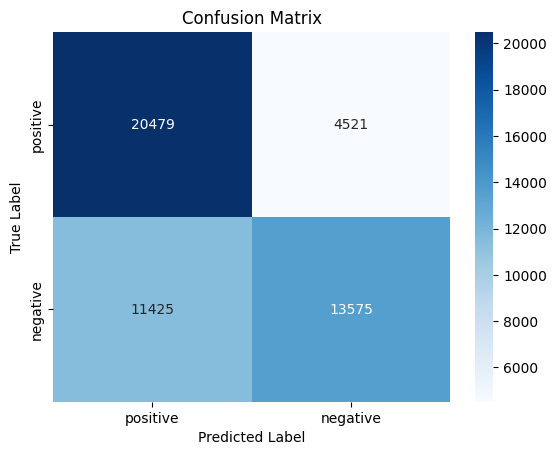

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()